In [38]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
from distgen.tools import update_quantity
from distgen.physical_constants import unit_registry

In [40]:
x = 5*unit_registry('m')

In [41]:
update_quantity(x, 10)

10 <Unit('meter')>

In [5]:
update_quantity(x, 'mm')

5 <Unit('millimeter')>

In [6]:
y = {'x':0, 'y':1}

In [7]:
def upd(k, d, val):
    d[k] = val

In [8]:
upd('x', y, 2)

In [9]:
y

{'x': 2, 'y': 1}

In [10]:
import yaml

In [11]:
with open('data/rad_new_format.uniform.in.yaml', 'r') as fid:
    inputs = yaml.safe_load(fid)

In [12]:
inputs

{'n_particle': 100000,
 'output': {'file': 'rad.uniform.out.txt', 'type': 'gpt'},
 'r_dist': {'max_r': '2 mm', 'min_r': '1 mm', 'type': 'radial_uniform'},
 'random': {'type': 'hammersley'},
 'start': {'MTE': '150 meV', 'type': 'cathode'},
 't_dist': {'avg_t': '0.5 ns', 'sigma_t': '2 ns', 'type': 'gaussian'},
 'total_charge': '10 pC'}

In [13]:
MTE = unit_registry(inputs['start']['MTE'])

In [14]:
MTE.magnitude

150

In [61]:
from distgen.tools import parse_quantity, is_quantity, is_unit

In [62]:
parse_quantity('5.0 mm')

5.0 <Unit('millimeter')>

In [78]:
parse_quantity('1 mm')

1 <Unit('millimeter')>

In [81]:
is_unit('1.0 mm')

False

In [67]:
parse_quantity({'value':5, 'units':'mm'})

5.0 <Unit('millimeter')>

In [83]:
parse_quantity('10000')

ValueError: Could not parse object into a quantity: 10000

In [19]:
from distgen import Generator

In [20]:
gen = Generator('data/rad_new_format.uniform.in.yaml')

In [21]:
P = gen.run()

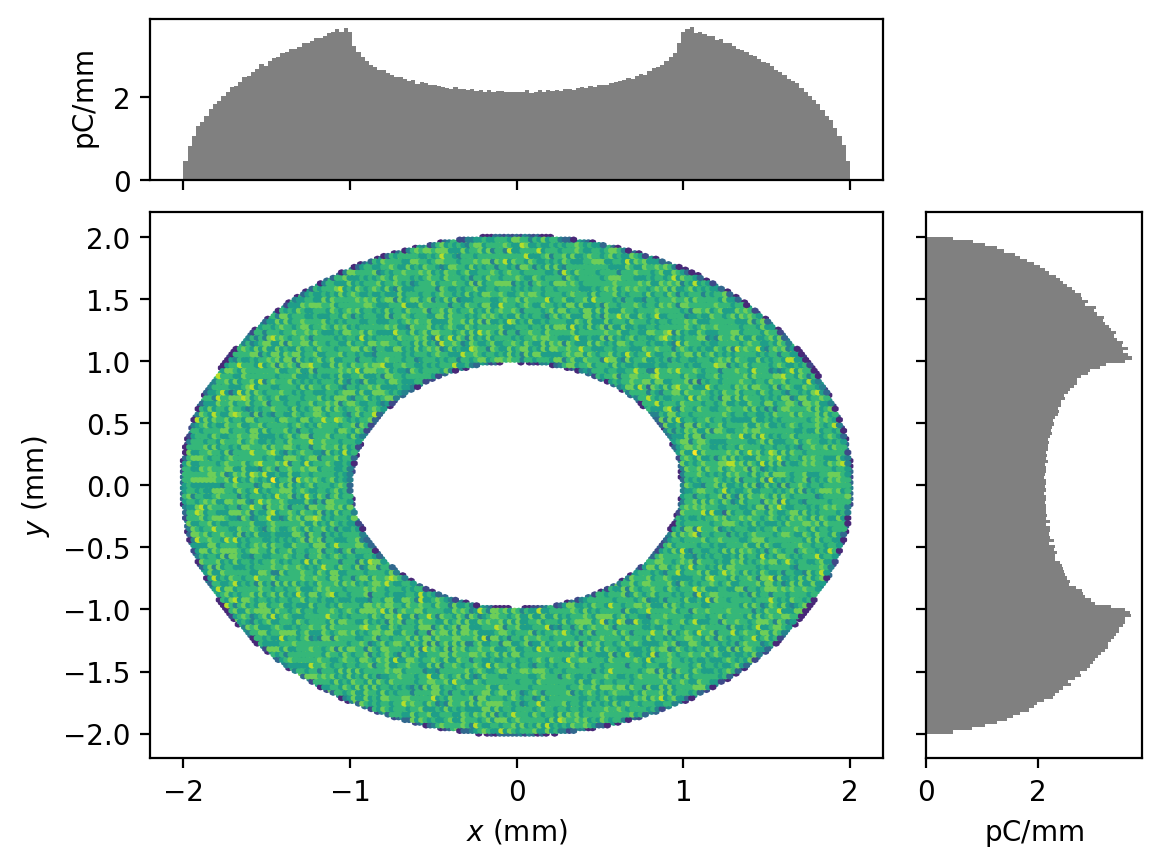

In [22]:
P.plot('x', 'y')

In [23]:
print(gen)

<disgten.Generator with input: 
n_particle: 100000
output:
  file: rad.uniform.out.txt
  type: gpt
r_dist:
  max_r: 2 mm
  min_r: 1 mm
  type: radial_uniform
random:
  type: hammersley
start:
  MTE: 150 meV
  type: cathode
t_dist:
  avg_t: 0.5 ns
  sigma_t: 2 ns
  type: gaussian
total_charge: 10 pC

>


In [24]:
gen['r_dist:max_r']

2 <Unit('millimeter')>

In [25]:
gen['r_dist:max_r:value']

2

In [26]:
gen['r_dist:max_r:units']

<Unit('millimeter')>

In [27]:
gen['r_dist:max_r:value']

2

In [29]:
gen.params

{'n_particle': 100000,
 'output': {'file': 'rad.uniform.out.txt', 'type': 'gpt'},
 'r_dist': {'max_r': 2 <Unit('millimeter')>,
  'min_r': 1 <Unit('millimeter')>,
  'type': 'radial_uniform'},
 'random': {'type': 'hammersley'},
 'start': {'MTE': 150 <Unit('millielectron_volt')>, 'type': 'cathode'},
 't_dist': {'avg_t': 0.5 <Unit('nanosecond')>,
  'sigma_t': 2 <Unit('nanosecond')>,
  'type': 'gaussian'},
 'total_charge': 10 <Unit('picocoulomb')>,
 'px_dist': {'type': 'g',
  'sigma_px': 276.8570795554992 <Unit('electron_volt / speed_of_light')>},
 'py_dist': {'type': 'g',
  'sigma_py': 276.8570795554992 <Unit('electron_volt / speed_of_light')>},
 'pz_dist': {'type': 'g',
  'sigma_pz': 276.8570795554992 <Unit('electron_volt / speed_of_light')>}}

In [77]:
'1mm' in unit_registry

True

In [34]:
unit_registry.Unit('5')

ValueError: Unit expression cannot have a scaling factor.

In [37]:
unit_registry.Quantity('mm')

1 <Unit('millimeter')>